In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
from sklearn.cluster import SpectralClustering as SC
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.cluster import KMeans as KM

In [3]:
import sklearn
sklearn.__version__

'0.24.2'

In [4]:
data_satu = pd.read_csv("1.csv")

In [5]:
data_satu.head()

,Unnamed: 0,X,y
0,0,664159,550946
1,1,665845,557965
2,2,597173,575538
3,3,618600,551446
4,4,635690,608046


In [6]:
koordinat = []

for row in data_satu.values:
    koordinat.append([row[1] , row[2]])

In [7]:
max([I[0] for I in koordinat]) , max([I[1] for I in koordinat])

(961951, 970756)

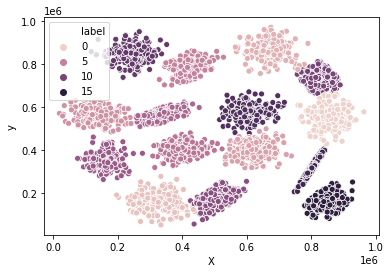

In [8]:
model = AC(n_clusters=15)
hasil = model.fit_predict(koordinat)
data_satu['label'] = hasil
sns.scatterplot(x='X', y='y', hue='label', data=data_satu)

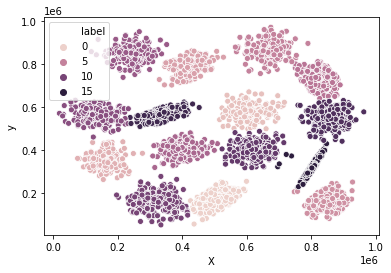

In [9]:
model = KM(n_clusters=15)
hasil = model.fit_predict(  koordinat)
data_satu['label'] = hasil
sns.scatterplot(x='X', y='y', hue='label', data=data_satu)

In [10]:
data_dua = pd.read_csv("2.csv")

In [11]:
koordinat = []

for row in data_dua.values:
    koordinat.append([row[1] , row[2]])

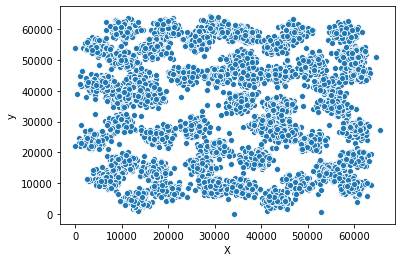

In [12]:
sns.scatterplot(x='X', y='y', data=data_dua)

In [13]:
from sklearn.cluster import DBSCAN

48


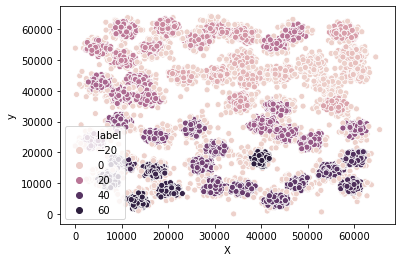

In [14]:
model = DBSCAN(eps=1000, min_samples=15)
hasil = model.fit_predict(koordinat)
print(max(hasil))
data_dua['label'] = hasil
sns.scatterplot(x='X', y='y', hue='label', data=data_dua)

In [15]:
data_tiga = pd.read_csv("3.csv")

In [16]:
koordinat = []

for row in data_tiga.values:
    koordinat.append([row[0] , row[1]])

In [17]:
# ANALISIS : OUTLIER CNT_CHILDREN
Q1 = data_tiga['CNT_CHILDREN'].quantile(0.25)
Q3 = data_tiga['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(Q3 + IQR *1.5)
print(Q1 - IQR *1.5)
data_tiga[data_tiga['CNT_CHILDREN'] > Q3 + IQR *1.5].head(5)

2.5
-1.5


,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
27,27,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12689,-1163,1,0,0,0,Laborers,5.0
28,28,5008837,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12689,-1163,1,0,0,0,Laborers,5.0
2190,2190,5021339,M,Y,Y,3,270000.0,Working,Higher education,Married,House / apartment,-15174,-582,1,0,0,0,NaN,5.0
2191,2191,5021340,M,Y,Y,3,270000.0,Working,Higher education,Married,House / apartment,-15174,-582,1,0,0,0,NaN,5.0
2192,2192,5021341,M,Y,Y,3,270000.0,Working,Higher education,Married,House / apartment,-15174,-582,1,0,0,0,NaN,5.0


In [18]:
# Ubah data
data_tiga.loc[data_tiga['CNT_CHILDREN'] >= 3 , 'CNT_CHILDREN'] = 3

In [19]:
# ANALISIS : Outlier CNT_FAM_MEMBERS
Q1 = data_tiga['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = data_tiga['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
print(Q3 + IQR *1.5)
print(Q1 - IQR *1.5)
data_tiga[data_tiga['CNT_FAM_MEMBERS'] > Q3 + IQR *1.5].head(5)

4.5
0.5


,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
27,27,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12689,-1163,1,0,0,0,Laborers,5.0
28,28,5008837,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12689,-1163,1,0,0,0,Laborers,5.0
2190,2190,5021339,M,Y,Y,3,270000.0,Working,Higher education,Married,House / apartment,-15174,-582,1,0,0,0,NaN,5.0
2191,2191,5021340,M,Y,Y,3,270000.0,Working,Higher education,Married,House / apartment,-15174,-582,1,0,0,0,NaN,5.0
2192,2192,5021341,M,Y,Y,3,270000.0,Working,Higher education,Married,House / apartment,-15174,-582,1,0,0,0,NaN,5.0


In [20]:
# Ubah data
data_tiga.loc[data_tiga['CNT_FAM_MEMBERS'] >= 5 , 'CNT_FAM_MEMBERS'] = 5

In [21]:
# Scale 0 sampai 1
data_tiga['DAYS_BIRTH'] *= -1
maksimal = max(data_tiga['DAYS_BIRTH'])
minimal = min(data_tiga['DAYS_BIRTH'])
size = maksimal - minimal
data_tiga['DAYS_BIRTH'] = (data_tiga['DAYS_BIRTH'] - minimal) / size

data_tiga['DAYS_EMPLOYED'] *= -1
maksimal = max(data_tiga['DAYS_EMPLOYED'])
minimal = min(data_tiga['DAYS_EMPLOYED'])
size = maksimal - minimal
data_tiga['DAYS_EMPLOYED'] = (data_tiga['DAYS_EMPLOYED'] - minimal) / size

data_tiga['AMT_INCOME_TOTAL'] *= -1
maksimal = max(data_tiga['AMT_INCOME_TOTAL'])
minimal = min(data_tiga['AMT_INCOME_TOTAL'])
size = maksimal - minimal
data_tiga['AMT_INCOME_TOTAL'] = (data_tiga['AMT_INCOME_TOTAL'] - minimal) / size

In [22]:
# Data ordinal

degrees = ['Lower secondary' , 'Secondary / secondary special' , 'Incomplete higher' , 'Higher education' , 'Academic degree']

for M in range(5):
    data_tiga.loc[data_tiga['NAME_EDUCATION_TYPE'] == degrees[M] , 'NAME_EDUCATION_TYPE' ] = M/5

In [23]:
# Data biner

data_tiga.loc[data_tiga['CODE_GENDER'] == 'F' , 'CODE_GENDER'] = 1
data_tiga.loc[data_tiga['CODE_GENDER'] == 'M' , 'CODE_GENDER'] = 0

data_tiga.loc[data_tiga['FLAG_OWN_CAR'] == 'Y' , 'FLAG_OWN_CAR'] = 1
data_tiga.loc[data_tiga['FLAG_OWN_CAR'] == 'N' , 'FLAG_OWN_CAR' ] = 0


data_tiga.loc[data_tiga['FLAG_OWN_REALTY'] == 'Y' , 'FLAG_OWN_REALTY'] = 1
data_tiga.loc[data_tiga['FLAG_OWN_REALTY'] == 'N' , 'FLAG_OWN_REALTY' ] = 0

In [24]:
# Scale 0 to 1

maksimal = max(data_tiga['AMT_INCOME_TOTAL'])
minimal = min(data_tiga['AMT_INCOME_TOTAL'])
size = maksimal - minimal
data_tiga['AMT_INCOME_TOTAL'] = (data_tiga['AMT_INCOME_TOTAL'] - minimal) / size

In [25]:
# One hot encoding
dummied_df = pd.get_dummies(data_tiga , columns = ["NAME_INCOME_TYPE" , "NAME_FAMILY_STATUS" , 
                                                   "NAME_HOUSING_TYPE" , "OCCUPATION_TYPE"])

In [26]:
# Buang indeks
del dummied_df['Unnamed: 0']

In [27]:
dummied_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,1,1,0,0.940303,0.6,0.254968,0.966066,1,...,0,0,0,0,0,0,0,0,0,0
1,5008805,0,1,1,0,0.940303,0.6,0.254968,0.966066,1,...,0,0,0,0,0,0,0,0,0,0
2,5008806,0,1,1,0,0.987150,0.2,0.789578,0.957163,1,...,0,0,0,0,0,0,0,0,1,0
3,5008808,1,0,1,0,0.963726,0.2,0.656109,0.962171,1,...,0,0,0,0,0,0,1,0,0,0
4,5008809,1,0,1,0,0.963726,0.2,0.656109,0.962171,1,...,0,0,0,0,0,0,1,0,0,0


In [28]:
nilai = dummied_df.values

In [40]:
# Salah satu percobaan analisis: PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
data = pca.fit_transform(dummied_df)

dictio = {'X' : [] , 'y' :[]}

for row in data:
    dictio['X'].append(int(row[0]))
    dictio['y'].append(int(row[1]))

In [41]:
data_four = pd.DataFrame(dictio)

In [42]:
data_four.tail()

,X,y
438552,817927,-1
438553,818045,-1
438554,819701,-1
438555,820588,0
438556,820708,0


In [43]:
data_four.head()

,X,y
0,-1013372,0
1,-1013371,0
2,-1013370,0
3,-1013368,-1
4,-1013367,-1


In [44]:
data_four['X'] -= min(data_four['X'].values)
data_four['X'] /= max(data_four['X'].values)

In [45]:
koordinat = []

for row in data_four.values:
    koordinat.append([row[0] , row[1]])

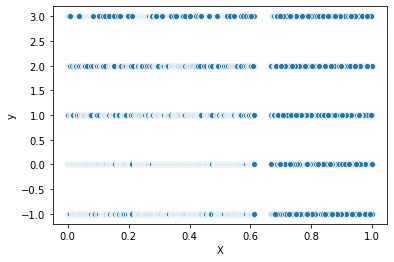

In [46]:
sns.scatterplot(x='X', y='y', data=data_four)

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


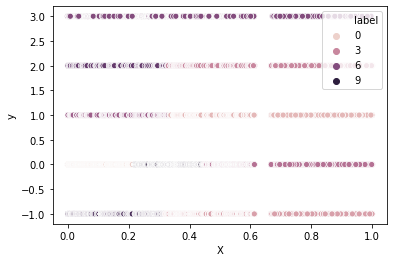

In [47]:
model = KM(n_clusters=10)
hasil = model.fit_predict(koordinat)
data_four['label'] = hasil
sns.scatterplot(x='X', y='y', hue='label', data=data_four)